#  **TASK 1 - Network Traffic Analysis** - 15019617

The task is to analyse a sample of network traffic for suspicious activity on some of the company workstations. As a result, three charts have been created to visualise aspects of the network traffic to provide an insight to what occurred during the 38 minute capture.

### Importing Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_data():

    data = pd.read_csv('./T1_data/T1_data.csv')
    return data

data = load_csv_data()

### Pre Processing

In [3]:
Bar = pd.value_counts(data['Protocol'])
Line = data.groupby(data['Time'].astype('datetime64[m]')).count()
Scat = pd.crosstab(data['Source'], data['Destination']).stack().reset_index(name='Z')

This cell was used to manipulate the raw data so that appropriate values could be visualised.

## Data Visualisation

### 1. Line Chart - Quantity of Packets Sent per Minute

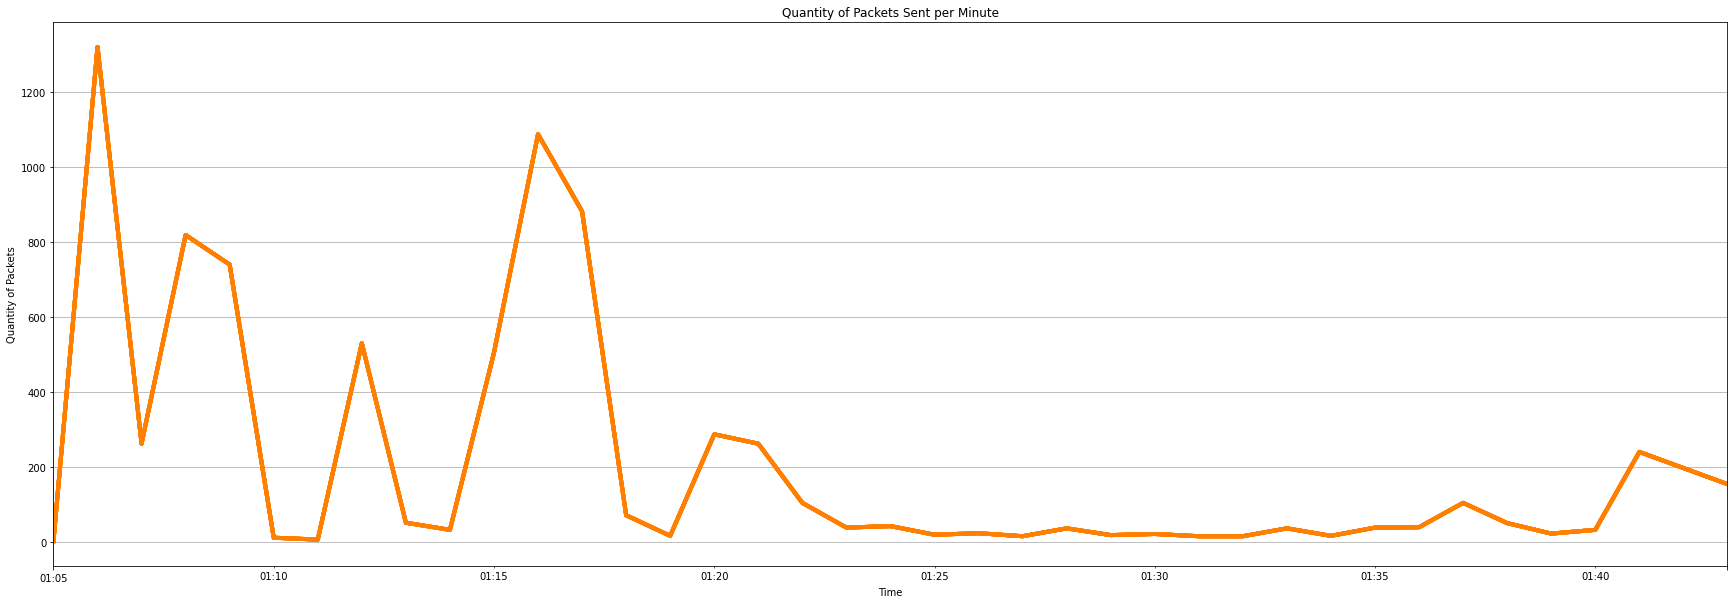

In [8]:
Line.plot(kind='line',title="Quantity of Packets Sent per Minute", xlabel="Time",
          ylabel="Quantity of Packets",linewidth=4,color='#FF8000',figsize=(30,10),legend=None).grid(True)

Over the approximately 40 minute network traffic capture, the quantity of traffic drastically changes. This chart shows the number of packets captured per minute. There are several notable spikes in traffic which account for roughly half of the packets sent. While the second half of the chart represents a more stable traffic capture.

### 2. Bar Chart - Packets Sent per Protocol

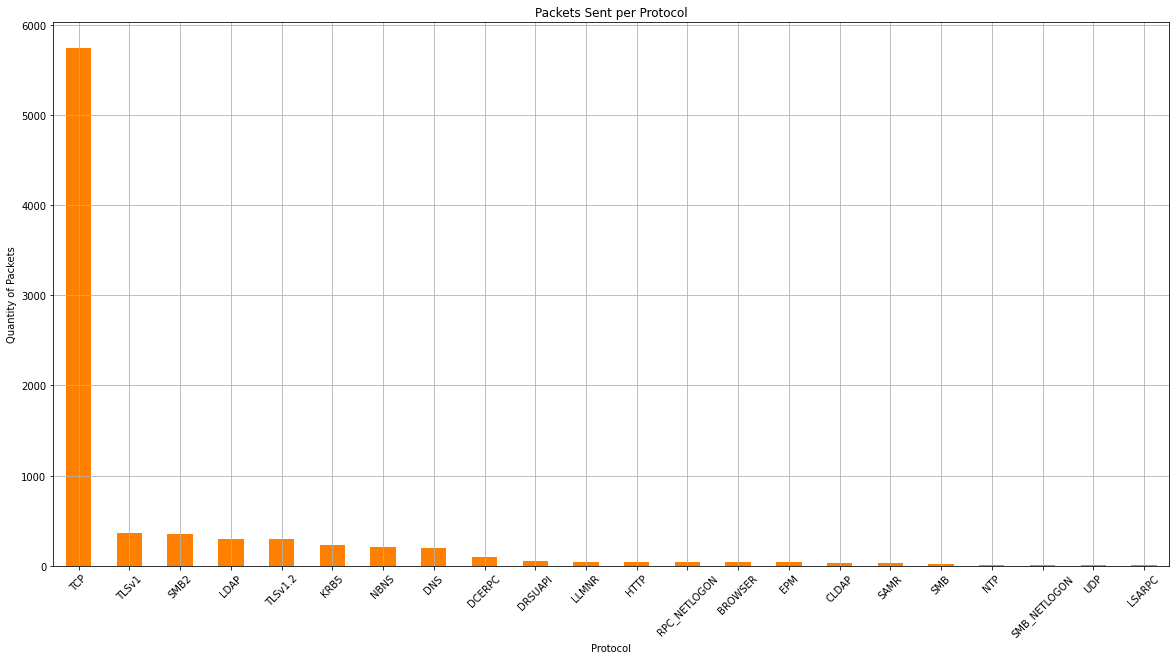

In [7]:
Bar.plot(kind='bar', 
        title="Packets Sent per Protocol",xlabel="Protocol",ylabel="Quantity of Packets",
        rot=45,color='#FF8000', figsize=(20,10)).grid(True)

This barchart shows the quantity of packets sent per protocol. It can be seen that the vast majority of packets sent was through TCP, ~5800/8159 packets.

### 3. Scatter Chart - Source and Destination Communication

Text(0.5, 1.0, 'Source and Destination Communication')

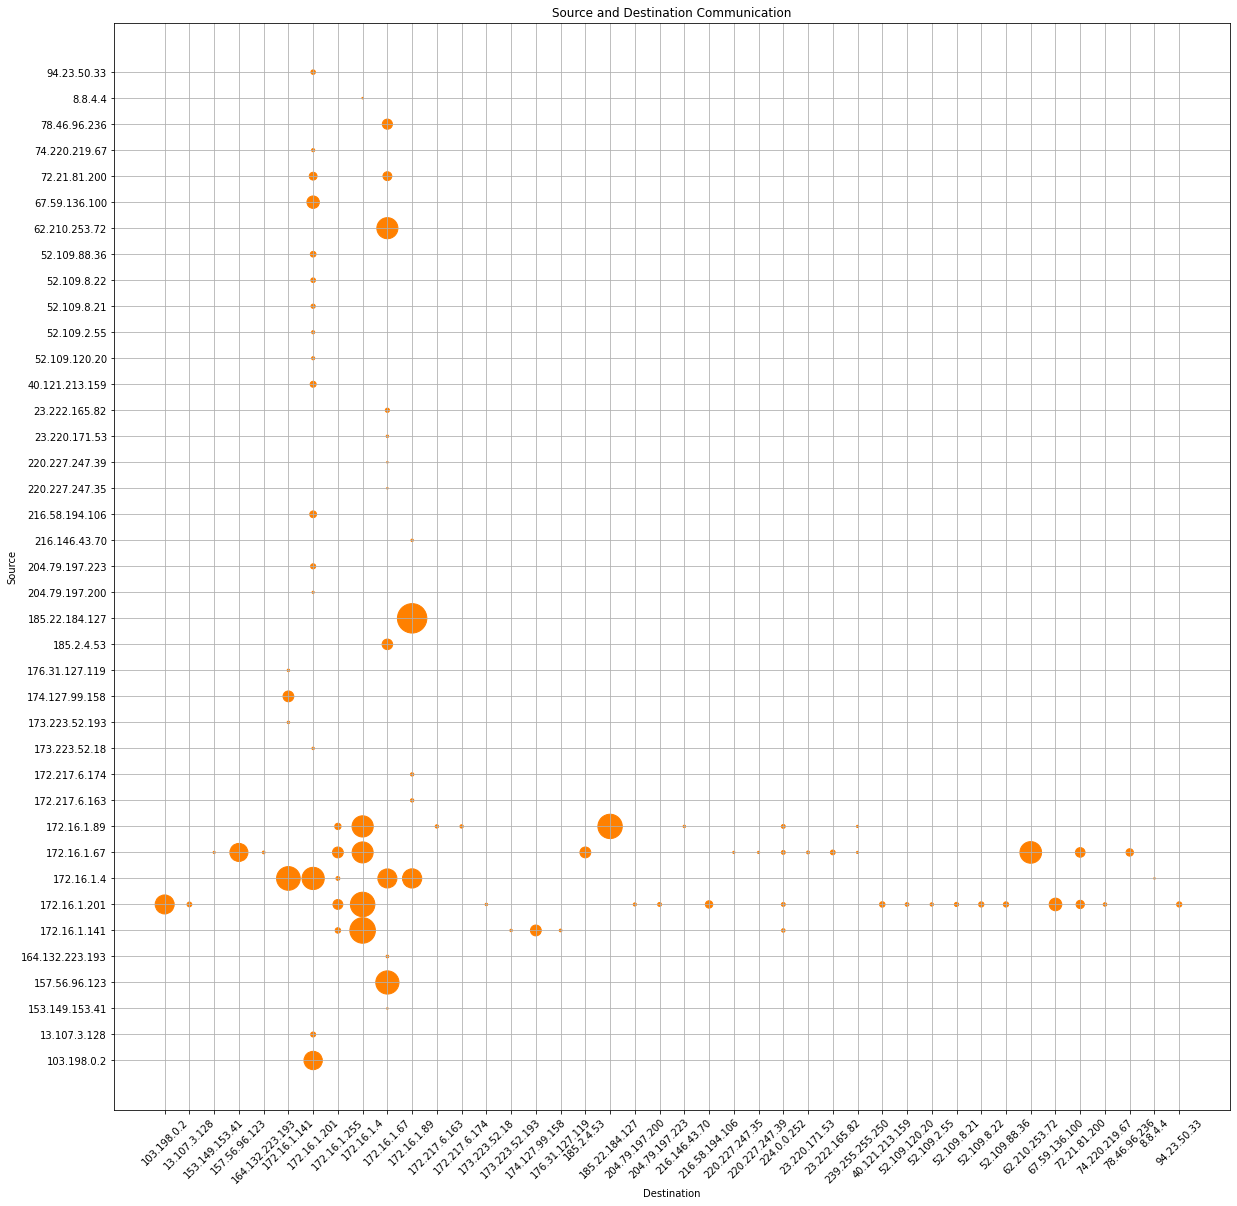

In [6]:
Scat.plot.scatter('Destination','Source', s=Scat.Z * 5,marker='.',rot=45,color='#FF8000',figsize=(20,20)).grid(True)
plt.title("Source and Destination Communication")

This scatter plot shows the communication between nodes on the network. The size of the plot represents the amount of packets sent between the two IP addresses, the larger the plot the more packets were sent. This shows that there are many IP addresses which did not interact with high frequency. However, there are nodes on the network with substantially higher activity.

## Insights

These three graphs begin to depict the suspicious activities on the company workstations. As the line graph shows, there are frequent spikes in network traffic, which in the scatter chart can be seen to be coming from a fraction of the total nodes in the company environment. It would appear that these nodes are using the TCP protocol. This could suggest an attempt at TCP SYN Flooding; further investigation would be required to validate this theory. This would be done by filtering down and checking which IP addresses are sending what packets and at what time.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Line chart (20%)**: You estimate that your grade will be 100.

- **Bar chart (20%)**: You estimate that your grade will be 100.

- **Scatter plot (20%)**: You estimate that your grade will be 100.

- **Markdown (40%)**: You estimate that your grade will be 100.


Please add any further comments related to your self-assessment: I believe I have fulfilled the marking criteria, initially I struggled to make the graphs clear to interpret. However, after working through them I feel as though I have represented the data clearly and understand what steps I would need to next take to perform a full data analysis.